# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find("table", {"class":"table"})

dfs = pd.read_html(str(table))
df = dfs[0]

df.head()

C:\Users\vsanh\AppData\Local\Temp\ipykernel_45388\965726729.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(table))


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [18]:
# Create an empty list
rows = []

# Loop through the scraped data to create a list of rows
table_rows = table.find_all("tr", {"class": "data-row"})
for table_row in table_rows:
    id = table_row.find_all("td")[0].text
    terrestrial_date = table_row.find_all("td")[1].text
    sol = table_row.find_all("td")[2].text
    ls = table_row.find_all("td")[3].text
    month = table_row.find_all("td")[4].text
    min_temp = table_row.find_all("td")[5].text
    pressure = table_row.find_all("td")[6].text

    row = {
        "id": id,
        "terrestrial_date": terrestrial_date,
        "sol": sol,
        "ls": ls,
        "month": month,
        "min_temp": min_temp,
        "pressure": pressure
    }

    rows.append(row)


In [19]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(rows)

In [20]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [21]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [51]:
# Change data types for data analysis
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])
df["min_temp"] = df["min_temp"].astype(float).astype(int)
df["pressure"] = df["pressure"].astype(float).astype(int)

In [52]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   object        
 3   ls                1867 non-null   object        
 4   month             1867 non-null   object        
 5   min_temp          1867 non-null   int32         
 6   pressure          1867 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(4)
memory usage: 87.6+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [53]:
# 1. How many months are there on Mars?
df.month.nunique()

12

In [54]:
# 2. How many sols (Martian days) worth of data are there?
df.sol.count()

1867

In [55]:
# 3. What is the average minimum temperature by month?
df.groupby("month").agg({"min_temp": "mean"})

,min_temp
month,
1,-77.160920
10,-71.982143
11,-71.985507
12,-74.451807
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320


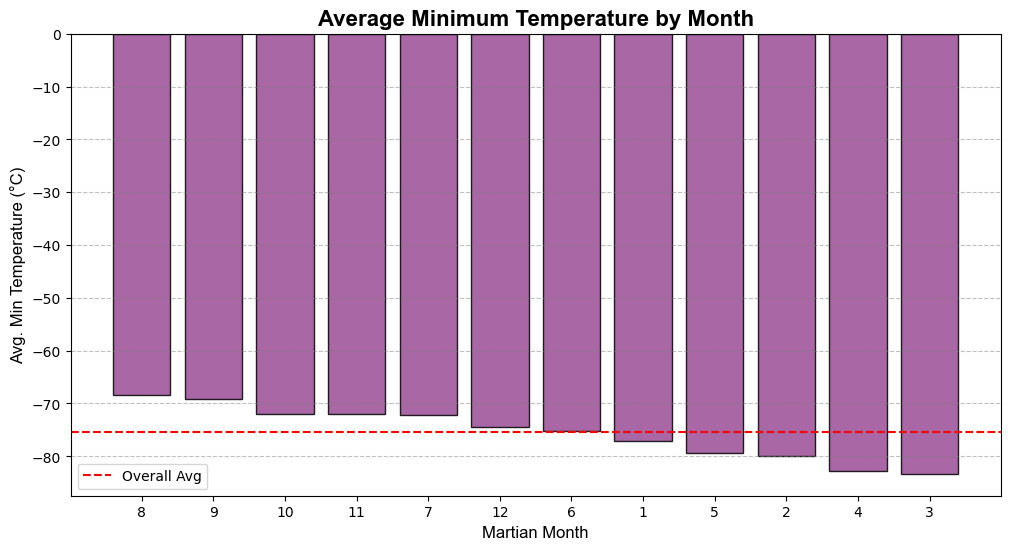

In [68]:
# Plot the average minimum temperature by month

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a bar plot 
plt.bar(data.index, data.values, color="#9A4C95", edgecolor="black", alpha=0.85)

# Add labels and title
plt.xlabel("Martian Month", fontfamily="Arial", fontsize=12)
plt.ylabel("Avg. Min Temperature (°C)", fontfamily="Arial", fontsize=12)
plt.title("Average Minimum Temperature by Month", fontweight="bold", fontsize=16, fontfamily="Arial")

# Customize x-axis ticks for readability
plt.xticks(ticks=data.index, labels=data.index, fontsize=10)

# Add reference lines for better interpretation
plt.axhline(y=data.values.mean(), color="red", linestyle="--", label="Overall Avg")  
plt.legend()

# Add a background grid for clarity
plt.grid(axis="y", linestyle="--", color="gray", alpha=0.5)

# Show the plot
plt.show()


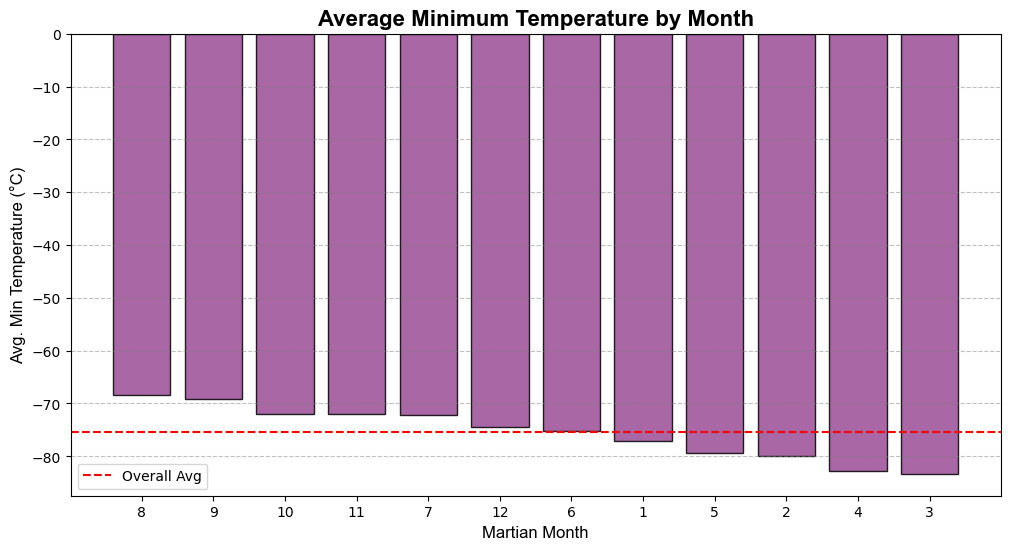

In [67]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
data = df.groupby("month").min_temp.mean().sort_values(ascending=False)
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a bar plot 
plt.bar(data.index, data.values, color="#9A4C95", edgecolor="black", alpha=0.85)

# Add labels and title
plt.xlabel("Martian Month", fontfamily="Arial", fontsize=12)
plt.ylabel("Avg. Min Temperature (°C)", fontfamily="Arial", fontsize=12)
plt.title("Average Minimum Temperature by Month", fontweight="bold", fontsize=16, fontfamily="Arial")

# Customize x-axis ticks for readability
plt.xticks(ticks=data.index, labels=data.index, fontsize=10)

# Add reference lines for better interpretation
plt.axhline(y=data.values.mean(), color="red", linestyle="--", label="Overall Avg")  
plt.legend()

# Add a background grid for clarity
plt.grid(axis="y", linestyle="--", color="gray", alpha=0.5)

# Show the plot
plt.show()

In [59]:
# 4. What is the average pressure by month?
df.groupby("month").pressure.mean()

month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64

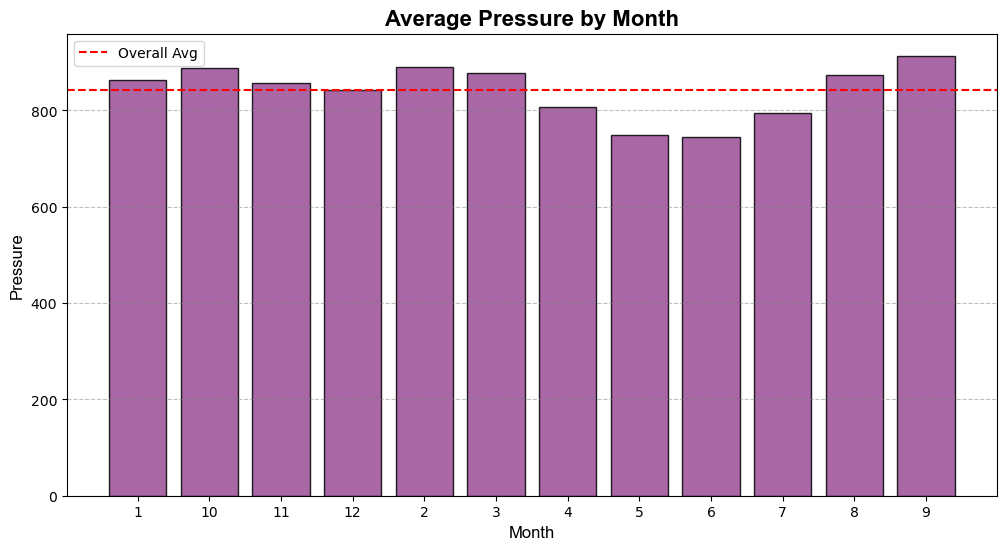

In [60]:
# Plot the average pressure by month
data2 = df.groupby("month").pressure.mean()
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a bar plot 
plt.bar(data2.index, data2.values, color="#9A4C95", edgecolor="black", alpha=0.85)

# Add labels and title
plt.xlabel("Month", fontfamily="Arial", fontsize=12)
plt.ylabel("Pressure", fontfamily="Arial", fontsize=12)
plt.title("Average Pressure by Month", fontweight="bold", fontsize=16, fontfamily="Arial")

# Customize x-axis ticks for readability
plt.xticks(ticks=data.index, labels=data.index, fontsize=10)

# Add reference lines for better interpretation
plt.axhline(y=data2.values.mean(), color="red", linestyle="--", label="Overall Avg")  
plt.legend()

# Add a background grid for clarity
plt.grid(axis="y", linestyle="--", color="gray", alpha=0.5)

# Show the plot
plt.show()

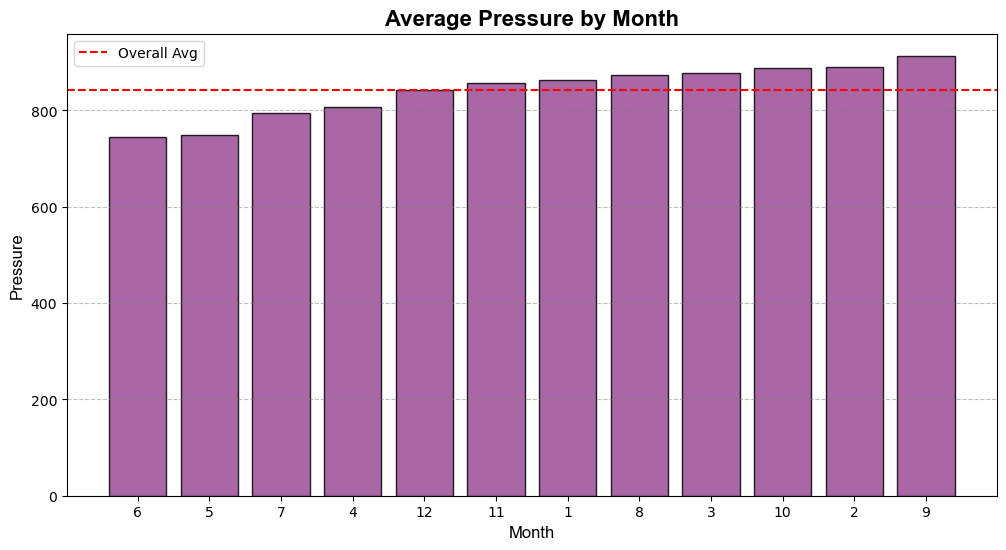

In [62]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Plot the average pressure by month
data2 = df.groupby("month").pressure.mean().sort_values(ascending=True)
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a bar plot 
plt.bar(data2.index, data2.values, color="#9A4C95", edgecolor="black", alpha=0.85)

# Add labels and title
plt.xlabel("Month", fontfamily="Arial", fontsize=12)
plt.ylabel("Pressure", fontfamily="Arial", fontsize=12)
plt.title("Average Pressure by Month", fontweight="bold", fontsize=16, fontfamily="Arial")

# Customize x-axis ticks for readability
plt.xticks(ticks=data.index, labels=data.index, fontsize=10)

# Add reference lines for better interpretation
plt.axhline(y=data2.values.mean(), color="red", linestyle="--", label="Overall Avg")  
plt.legend()

# Add a background grid for clarity
plt.grid(axis="y", linestyle="--", color="gray", alpha=0.5)

# Show the plot
plt.show()

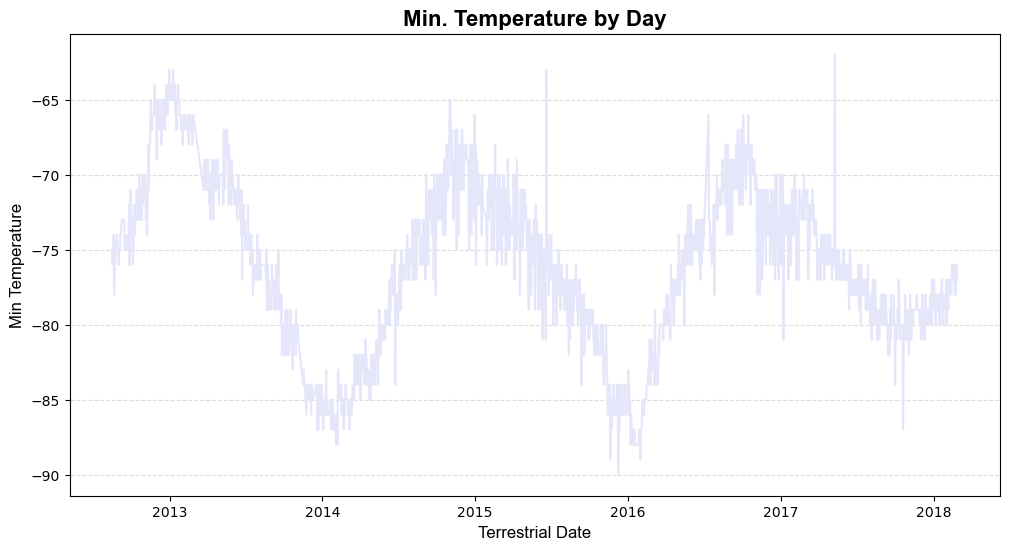

In [66]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

plt.figure(figsize=(12, 6))

# Create a basic plot
plt.plot(df.terrestrial_date, df.min_temp, color="lavender")
plt.xlabel("Terrestrial Date", fontfamily="Arial", fontsize=12)
plt.ylabel("Min Temperature", fontfamily="Arial", fontsize=12)
plt.title("Min. Temperature by Day", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

#### Minimum Temperature

In the 8th Martian month, the minimum temperature rises slightly to just below -70°C, indicating a seasonal variation compared to the yearly average of -75°C. This suggests that while Mars remains extremely cold year-round, certain months experience marginal warming, likely due to variations in solar exposure and atmospheric dynamics.

#### Atmospheric Pressure

Mars' atmospheric pressure is at its lowest in the 6th month, dropping well below 800 Pa, probably because CO₂ freezes at the poles and thins out the air. By the 9th month, it climbs well above 800 Pa as the ice turns back into gas, making the atmosphere a little thicker again.









#### Year Length

From the graph, we can notice the pattern of temp changes, suggesting the year length is about two Earth years. Despite this extended orbit, the planet stays extremely cold year-round, with an average minimum temperature of around -75°C, showing little variation even across its long seasons.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [69]:
# Write the data to a CSV
df.to_csv("mars_data.csv", index=False)

In [ ]:
browser.quit()